Reaction forces in lbs
[[-12000.  -4000.]
 [  6000.      0.]]
Deformation at each node in inches
[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.02666667  0.05104569]
 [-0.02        0.05771236]
 [ 0.05333333  0.18761424]
 [-0.00666667  0.20761424]]


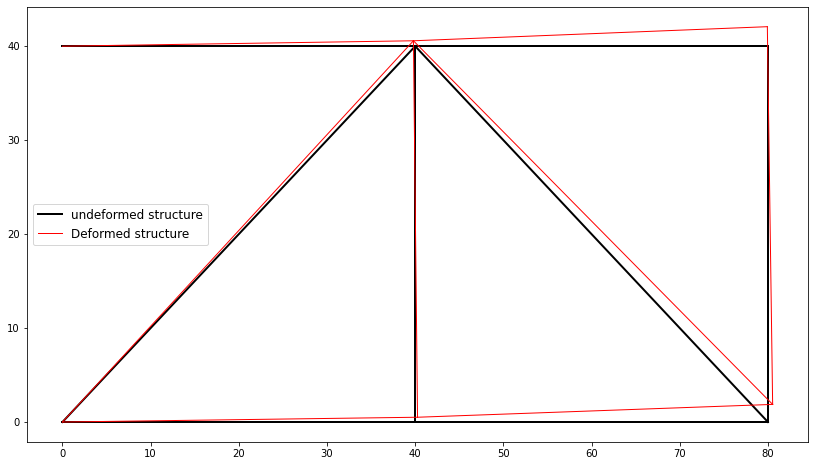

In [1]:

import math
import numpy as np
import matplotlib.pyplot as plt



A=1.5
E=1e7
nodes=[]
truss=[]

nodes.append([0,0])
nodes.append([0,40])
nodes.append([40,0])
nodes.append([40,40])
nodes.append([80,0])
nodes.append([80,40])



truss.append([0,2])
truss.append([0,3])
truss.append([1,3])
truss.append([2,3])
truss.append([2,4])
truss.append([3,4])
truss.append([3,5])
truss.append([4,5])


#nodes and truss array
nodes=np.array(nodes).astype(float)
truss=np.array(truss)

#loads
P=np.zeros_like(nodes)
P[2,1]=-2000
P[4,0]= 2000
P[5,0]= 4000
P[5,1]= 6000

#boundary conditions
Ur=[0,0,0,0]

#DOF (fixed nodes)
dofc=np.ones_like(nodes).astype(int)
dofc[0,:]=0
dofc[1,:]=0



def analysis():
    N=len(nodes)
    E=len(truss)
    dof=2
    ndof=dof*N
    
    d=nodes[truss[:,1],:]-nodes[truss[:,0],:]
    L=np.sqrt((d**2).sum(axis=1))
    angle=d.T/L
    a=np.concatenate((-angle.T,angle.T),axis=1)
    K=np.zeros([ndof,ndof])
    for k in range(E):
        aux=2*truss[k,:]
        index=np.r_[aux[0]:aux[0]+2,aux[1]:aux[1]+2]
        ES=np.dot(a[k][np.newaxis].T*E*A,a[k][np.newaxis]/L[k])
        K[np.ix_(index,index)]=K[np.ix_(index,index)]+ES
    
    freedof=dofc.flatten().nonzero()[0]
    supportdof=(dofc.flatten()==0).nonzero()[0]
    Kff=K[np.ix_(freedof,freedof)]
    Kfr=K[np.ix_(freedof,supportdof)]
    Krf=Kfr.T
    Krr=K[np.ix_(supportdof,supportdof)]
    Pf=P.flatten()[freedof]
    Uf=np.linalg.solve(Kff,Pf)
    U=dofc.astype(float).flatten()
    U[freedof]=Uf
    U[supportdof]=Ur
    U=U.reshape(N,2)
    u=np.concatenate((U[truss[:,0]],U[truss[:,1]]),axis=1)
    Ne=E*A/L[:]*(a[:]*u[:]).sum(axis=1)
    R=(Krf[:]*Uf).sum(axis=1)+(Krr[:]*Ur).sum(axis=1)
    R=R.reshape(2,dof)
    return np.array(Ne),np.array(R),U
def Plottruss(nodes,c,lt,lw,lg):
    for i in range(len(truss)):
        xi,xf=nodes[truss[i,0],0], nodes[truss[i,1],0]
        yi,yf=nodes[truss[i,0],1], nodes[truss[i,1],1]
        
        line,= plt.plot([xi,xf],[yi,yf],color=c,linestyle=lt,linewidth=lw)
    line.set_label(lg)
    plt.legend(prop={'size':12})
    

Ne,R,U=analysis()
# print('Axial forces')
# print(Ne[np.newaxis].T)
print("Reaction forces in lbs")
print(R)
print("Deformation at each node in inches")
print(U*10**(-6))
plt.figure(figsize=(14,8))
Plottruss(nodes,'black','-',2,"undeformed structure") 
scale=1


Dnodes=U*scale*10**(-5)+nodes
Plottruss(Dnodes,'red',"-",1,"Deformed structure")


# import pandas as pd
# df = pd.DataFrame(Ne[np.newaxis].T)
# print(df)
               
